Replace `'path/to/your/dataset.csv'` with the actual path to your CSV file within your Google Drive. For example, if your file is in a folder named `data` in your Drive, the path would be `/content/drive/My Drive/data/your_dataset.csv`.

In [ ]:
from google.colab import drive
import pandas as pd

drive.mount('/content/drive', force_remount=True)

file_path = '/content/drive/My Drive/Employee_dataset/survey_results_public.csv'

df = pd.read_csv(file_path)
print("✅ Dataset loaded successfully!")
df.head()


Mounted at /content/drive
✅ Dataset loaded successfully!


,ResponseId,Q120,MainBranch,Age,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,ProfessionalTech,Industry,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,I agree,None of these,18-24 years old,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I agree,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,Hobby;Contribute to open-source projects;Boots...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;Friend or fam...,Formal documentation provided by the owner of ...,...,1-2 times a week,10+ times a week,Never,15-30 minutes a day,15-30 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,285000.0
2,3,I agree,I am a developer by profession,45-54 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby;Professional development or self-paced l...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Formal documentation provided by the owner of ...,...,6-10 times a week,6-10 times a week,3-5 times a week,30-60 minutes a day,30-60 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,250000.0
3,4,I agree,I am a developer by profession,25-34 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Colleague;Friend or family member;Other online...,Formal documentation provided by the owner of ...,...,1-2 times a week,10+ times a week,1-2 times a week,15-30 minutes a day,30-60 minutes a day,Automated testing;Continuous integration (CI) ...,NaN,Appropriate in length,Easy,156000.0
4,5,I agree,I am a developer by profession,25-34 years old,"Employed, full-time;Independent contractor, fr...",Remote,Hobby;Contribute to open-source projects;Profe...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Online Courses or Certi...,Formal documentation provided by the owner of ...,...,1-2 times a week,1-2 times a week,3-5 times a week,60-120 minutes a day,30-60 minutes a day,Microservices;Automated testing;Observability ...,Other,Appropriate in length,Neither easy nor difficult,23456.0


In [ ]:
df.info()
print(df.columns.tolist())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89184 entries, 0 to 89183
Data columns (total 84 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   ResponseId                           89184 non-null  int64  
 1   Q120                                 89184 non-null  object 
 2   MainBranch                           89184 non-null  object 
 3   Age                                  89184 non-null  object 
 4   Employment                           87898 non-null  object 
 5   RemoteWork                           73810 non-null  object 
 6   CodingActivities                     73764 non-null  object 
 7   EdLevel                              87973 non-null  object 
 8   LearnCode                            87663 non-null  object 
 9   LearnCodeOnline                      70084 non-null  object 
 10  LearnCodeCoursesCert                 37076 non-null  object 
 11  YearsCode                   

In [ ]:

df.describe(include='all')
df.isnull().sum()

# Select relevant features
reduced_features = ['EdLevel', 'Employment', 'DevType', 'YearsCodePro', 'Country', 'ConvertedCompYearly', 'Age','OrgSize']
df = df[reduced_features]

# Rename for convenience
df = df.rename(columns={
    'EdLevel': 'Education',
    'YearsCodePro': 'Experience',
    'ConvertedCompYearly': 'Salary'
})

# Drop missing values
df = df[df['Salary'].notnull()].dropna()



In [ ]:
print(df['OrgSize'])


1                2 to 9 employees
2        5,000 to 9,999 employees
3            100 to 499 employees
4              20 to 99 employees
5            100 to 499 employees
                   ...           
89162    5,000 to 9,999 employees
89166          20 to 99 employees
89167          20 to 99 employees
89170        500 to 999 employees
89171          10 to 19 employees
Name: OrgSize, Length: 47701, dtype: object


In [ ]:
def map_org_size(size_str):
    size_str = str(size_str).replace(',', '').lower().strip()

    if 'to' in size_str:
        try:
            low, _ = size_str.split('to')
            low = int(low.strip())
            if low < 10:
                return 'Micro'
            elif low < 50:
                return 'Small'
            elif low < 250:
                return 'Medium'
            elif low < 1000:
                return 'Large'
            else:
                return 'Enterprise'
        except:
            return None  # if conversion fails
    return None  # for values like "Just me", "unknown", etc.


In [ ]:
df['OrgSize'] = df['OrgSize'].apply(map_org_size)



In [ ]:
valid_sizes = ['Small', 'Medium', 'Enterprise', 'Micro', 'Large']
df = df[df['OrgSize'].isin(valid_sizes)]


In [ ]:
df = pd.get_dummies(df, columns=['OrgSize'])


In [ ]:
print(df['Employment'].value_counts())


Employment
Employed, full-time                                                                             32901
Employed, full-time;Independent contractor, freelancer, or self-employed                         2861
Independent contractor, freelancer, or self-employed                                             2045
Employed, part-time                                                                               807
Independent contractor, freelancer, or self-employed;Employed, part-time                          194
Employed, full-time;Employed, part-time                                                           138
Employed, full-time;Independent contractor, freelancer, or self-employed;Employed, part-time       95
Employed, full-time;Retired                                                                         5
Independent contractor, freelancer, or self-employed;Retired                                        4
Employed, full-time;Independent contractor, freelancer, or self-employe

In [ ]:

# Step 1: Extract the first employment type from combinations
df['Employment'] = df['Employment'].apply(lambda x: x.split(';')[0].strip())

# Step 2: View new unique values
print(df['Employment'].value_counts())

# Step 3: Optional — Group less frequent types as "Other"
rare_emp = df['Employment'].value_counts()[df['Employment'].value_counts() < 200].index
df['Employment'] = df['Employment'].replace(rare_emp, 'Other')





Employment
Employed, full-time                                     36002
Independent contractor, freelancer, or self-employed     2244
Employed, part-time                                       808
Name: count, dtype: int64


In [ ]:
def clean_experience(x):
    if x == 'Less than 1 year':
        return 0.5
    elif x == 'More than 50 years':
        return 50
    else:
        return float(x)

df['Experience'] = df['Experience'].apply(clean_experience)


In [ ]:
# Step 1: Extract the first dev role
df['DevType'] = df['DevType'].apply(lambda x: x.split(';')[0].strip())

# Step 2: View role distribution
print(df['DevType'].value_counts())

# Step 3 (Optional): Group rare roles as "Other"
devtype_counts = df['DevType'].value_counts()
rare_roles = devtype_counts[devtype_counts < 300].index  # You can adjust this threshold
df['DevType'] = df['DevType'].replace(rare_roles, 'Other')

# Step 4: Check cleaned results
print("✅ Cleaned DevType values:\n", df['DevType'].value_counts())


DevType
Developer, full-stack                            14253
Developer, back-end                               7847
Developer, front-end                              2791
Developer, desktop or enterprise applications     1957
Developer, mobile                                 1388
Engineering manager                               1105
Other (please specify):                           1104
Developer, embedded applications or devices        976
DevOps specialist                                  763
Data scientist or machine learning specialist      741
Senior Executive (C-Suite, VP, etc.)               723
Engineer, data                                     690
Research & Development role                        633
Cloud infrastructure engineer                      542
Academic researcher                                492
Developer, game or graphics                        405
Data or business analyst                           340
Developer, QA or test                              275
Sy

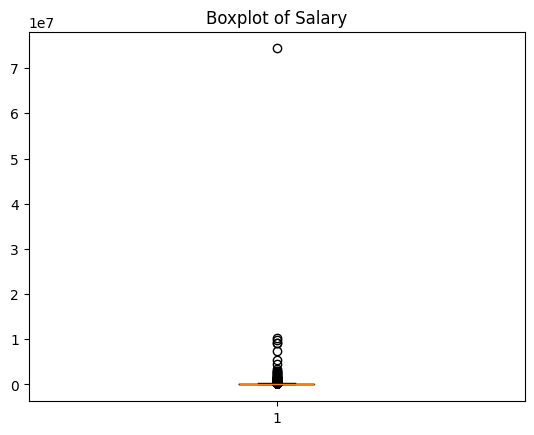

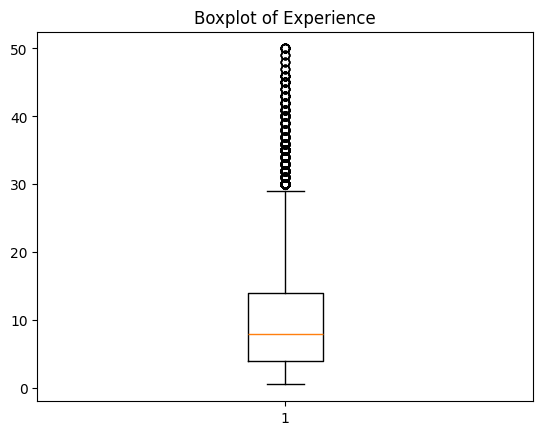

✅ Final shape after removing outliers: (33494, 12)


In [ ]:
import matplotlib.pyplot as plt

# -------------------------
# Salary Outlier Removal
# -------------------------
plt.boxplot(df['Salary'])
plt.title("Boxplot of Salary")
plt.show()

Q1 = df['Salary'].quantile(0.25)
Q3 = df['Salary'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.0 * IQR
upper_bound = Q3 + 1.0 * IQR

df = df[(df['Salary'] >= lower_bound) & (df['Salary'] <= upper_bound)]

# -------------------------
# Experience Outlier Removal
# -------------------------
plt.boxplot(df['Experience'])
plt.title("Boxplot of Experience")
plt.show()

Q1 = df['Experience'].quantile(0.25)
Q3 = df['Experience'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.0 * IQR
upper_bound = Q3 + 1.0 * IQR

df = df[(df['Experience'] >= lower_bound) & (df['Experience'] <= upper_bound)]

print("✅ Final shape after removing outliers:", df.shape)





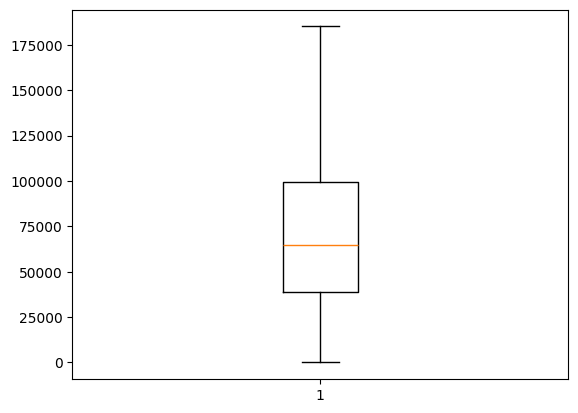

In [ ]:
plt.boxplot(df['Salary'])
plt.show()

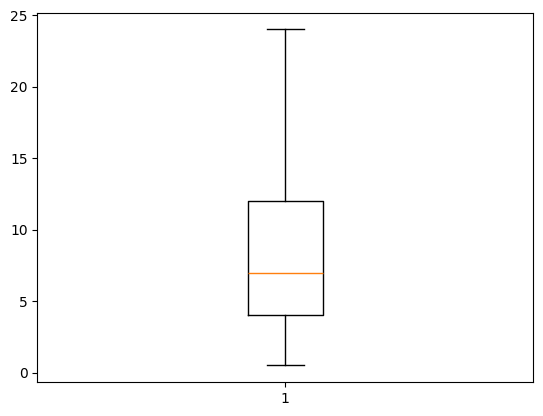

In [ ]:
plt.boxplot(df['Experience'])
plt.show()

In [ ]:
age_mapping = {
    '18-24 years old': 21,
    '25-34 years old': 29,
    '35-44 years old': 39,
    '45-54 years old': 49
}
df['AgeNumeric'] = df['Age'].map(age_mapping)
df = df[df['AgeNumeric'].notnull()]
df.drop(columns='Age', inplace=True)

# Replace rare countries
country_counts = df['Country'].value_counts()
rare_countries = country_counts[country_counts < 400].index
df['Country'] = df['Country'].replace(rare_countries, 'Other')



/tmp/ipython-input-120-545973297.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns='Age', inplace=True)


In [ ]:
edu_counts = df['Education'].value_counts()
rare_edu = edu_counts[edu_counts < 500].index
df = df[~df['Education'].isin(rare_edu)]
df['Education'] = df['Education'].apply(lambda x: 'Other' if x in rare_edu else x)


In [ ]:
df = df.copy()


In [ ]:
df = df[df['Salary'].notnull()].copy()


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Create and fit separate encoders
le_edu = LabelEncoder()
df['Education'] = le_edu.fit_transform(df['Education'])

le_country = LabelEncoder()
df['Country'] = le_country.fit_transform(df['Country'])

le_emp = LabelEncoder()
df['Employment'] = le_emp.fit_transform(df['Employment'])  # ✅ Corrected

le_dev = LabelEncoder()
df['DevType'] = le_dev.fit_transform(df['DevType'])

# Optional: Save encoders for later use (e.g., decoding or new data)
label_encoders = {
    'Education': le_edu,
    'Country': le_country,
    'Employment': le_emp,
    'DevType': le_dev
}




In [ ]:
df

,Education,Employment,DevType,Experience,Country,Salary,OrgSize_Enterprise,OrgSize_Large,OrgSize_Medium,OrgSize_Micro,OrgSize_Small,AgeNumeric
3,1,0,8,7.0,17,156000.0,False,False,True,False,False,29.0
4,1,0,9,4.0,10,23456.0,False,False,False,False,True,29.0
5,5,0,5,21.0,16,96828.0,False,False,True,False,False,39.0
6,5,0,9,3.0,17,135000.0,True,False,False,False,False,39.0
7,1,0,9,3.0,17,80000.0,False,False,False,False,True,29.0
...,...,...,...,...,...,...,...,...,...,...,...,...
89162,2,0,5,24.0,2,50719.0,True,False,False,False,False,39.0
89166,5,0,9,2.0,10,16917.0,False,False,False,False,True,21.0
89167,1,0,11,2.0,7,15752.0,False,False,False,False,True,21.0
89170,2,0,15,9.0,5,64254.0,False,True,False,False,False,29.0


In [ ]:
df['Edu_Exp'] = df['Education'] * df['Experience']
df['Country_Exp'] = df['Country'] * df['Experience']
df['Edu_Country'] = df['Education'] * df['Country']



In [ ]:
print(df.columns)



Index(['Education', 'Employment', 'DevType', 'Experience', 'Country', 'Salary',
       'OrgSize_Enterprise', 'OrgSize_Large', 'OrgSize_Medium',
       'OrgSize_Micro', 'OrgSize_Small', 'AgeNumeric', 'Edu_Exp',
       'Country_Exp', 'Edu_Country'],
      dtype='object')


In [ ]:
# ✅ Full feature set including interaction features and one-hot OrgSize columns
X = df[['Education', 'Employment', 'DevType', 'Experience', 'Country',
        'Edu_Exp', 'Country_Exp',
        'OrgSize_Enterprise', 'OrgSize_Large', 'OrgSize_Medium',
        'OrgSize_Micro', 'OrgSize_Small']]

y = df['Salary']

# Update categorical and numeric features (OrgSize already one-hot encoded)
categorical_features = ['Education', 'Employment', 'DevType', 'Country']
numeric_features = ['Experience', 'Edu_Exp', 'Country_Exp',
                    'OrgSize_Enterprise', 'OrgSize_Large', 'OrgSize_Medium',
                    'OrgSize_Micro', 'OrgSize_Small']


In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

# Preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features),
        ('num', 'passthrough', numeric_features)
    ]
)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor

# Define pipelines
pipe_lr = Pipeline([('preprocessor', preprocessor), ('regressor', LinearRegression())])
pipe_rf = Pipeline([('preprocessor', preprocessor), ('regressor', RandomForestRegressor(random_state=42))])
pipe_xgb = Pipeline([('preprocessor', preprocessor), ('regressor', XGBRegressor(random_state=42, verbosity=0))])
pipe_gb = Pipeline([('preprocessor', preprocessor), ('regressor', GradientBoostingRegressor(random_state=42))])  # 🔥 New

# Fit all models
pipe_lr.fit(X_train, y_train)
pipe_rf.fit(X_train, y_train)
pipe_xgb.fit(X_train, y_train)
pipe_gb.fit(X_train, y_train)




Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Education', 'Employment',
                                                   'DevType', 'Country']),
                                                 ('num', 'passthrough',
                                                  ['Experience', 'Edu_Exp',
                                                   'Country_Exp',
                                                   'OrgSize_Enterprise',
                                                   'OrgSize_Large',
                                                   'OrgSize_Medium',
                                                   'OrgSize_Micro',
                                                   'OrgSize_Small'])])),
                ('regressor', GradientBoostingRegressor(random_state=42))])

Linear Regression:
 R2: 0.56, MAE: 22317.56, RMSE: 29448.66

Random Forest:
 R2: 0.52, MAE: 23131.17, RMSE: 30968.57

XGBoost:
 R2: 0.57, MAE: 21723.25, RMSE: 29086.99

Gradient Boosting:
 R2: 0.58, MAE: 22099.19, RMSE: 28986.88



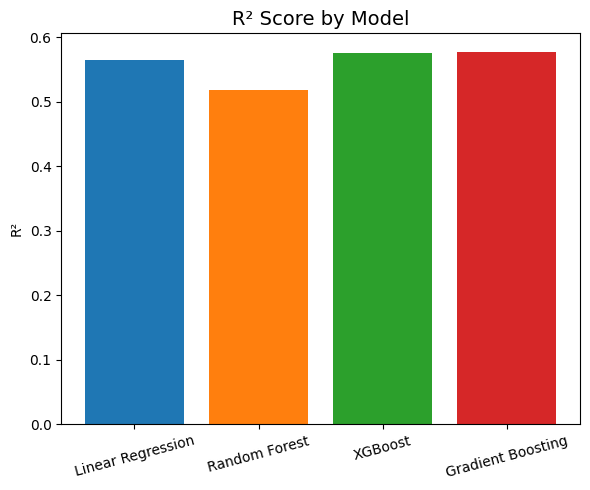

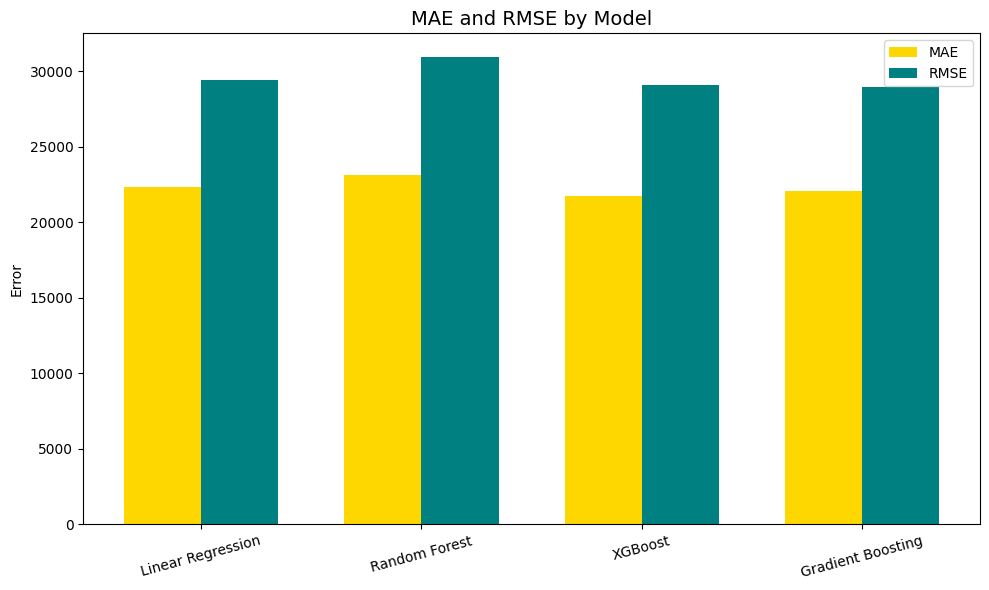

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

metrics_list = []

# Evaluate function
def evaluate(model, X_test, y_test, name):
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    metrics_list.append({
        'Model': name,
        'R2': round(r2, 3),
        'MAE': round(mae, 2),
        'RMSE': round(rmse, 2)
    })

    print(f"{name}:\n R2: {r2:.2f}, MAE: {mae:.2f}, RMSE: {rmse:.2f}\n")

# Evaluate all models
evaluate(pipe_lr, X_test, y_test, "Linear Regression")
evaluate(pipe_rf, X_test, y_test, "Random Forest")
evaluate(pipe_xgb, X_test, y_test, "XGBoost")
evaluate(pipe_gb, X_test, y_test, "Gradient Boosting")

# Create DataFrame
metrics_df = pd.DataFrame(metrics_list)

# Colors per model
colors = {
    "Linear Regression": "#1f77b4",  # blue
    "Random Forest": "#ff7f0e",      # orange
    "XGBoost": "#2ca02c",            # green
    "Gradient Boosting": "#d62728"   # red
}

# 📊 Plot R² Score (Separate)
plt.figure(figsize=(6, 5))
plt.bar(metrics_df['Model'], metrics_df['R2'], color=[colors[m] for m in metrics_df['Model']])
plt.title("R² Score by Model", fontsize=14)
plt.ylabel("R²")
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

# 📊 Plot MAE and RMSE (Combined Grouped Bar Chart)
x = np.arange(len(metrics_df['Model']))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))
bar1 = ax.bar(x - width/2, metrics_df['MAE'], width, label='MAE', color='gold')
bar2 = ax.bar(x + width/2, metrics_df['RMSE'], width, label='RMSE', color='teal')

ax.set_title("MAE and RMSE by Model", fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(metrics_df['Model'], rotation=15)
ax.set_ylabel("Error")
ax.legend()
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid for Gradient Boosting
param_grid = {
    'regressor__n_estimators': [100, 200],
    'regressor__learning_rate': [0.05, 0.1, 0.2],
    'regressor__max_depth': [3, 5, 7]
}

# GridSearchCV with cross-validation
grid_search = GridSearchCV(
    pipe_gb,
    param_grid,
    cv=5,
    scoring='r2',
    n_jobs=-1,
    verbose=1
)

# Fit to training data
grid_search.fit(X_train, y_train)

# Best parameters
print("✅ Best Parameters:", grid_search.best_params_)

# Best model
best_gb_model = grid_search.best_estimator_


Fitting 5 folds for each of 18 candidates, totalling 90 fits
✅ Best Parameters: {'regressor__learning_rate': 0.2, 'regressor__max_depth': 3, 'regressor__n_estimators': 200}


In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

y_pred = best_gb_model.predict(X_test)

print("📊 Tuned Gradient Boosting Performance:")
print("R² Score:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))



📊 Tuned Gradient Boosting Performance:
R² Score: 0.5933240278960115
MAE: 21342.577663325144
RMSE: 28437.075876719762


In [ ]:
import joblib
joblib.dump(best_gb_model, "best_gb_model.pkl")



['best_gb_model.pkl']

In [ ]:
# Set exchange rate: 1 USD = 83 INR (update as needed)
USD_TO_INR = 83

# Step 1: Input new data
new_data = pd.DataFrame({
    'Education': ['Bachelor’s degree (B.A., B.S., B.Eng., etc.)'],
    'Employment': ['Employed, full-time'],
    'DevType': ['Developer, full-stack'],
    'Country': ['India'],
    'Experience': [5],
    'OrgSize': ['Large']  # Include OrgSize input
})

# Step 2: Apply label encoders (same as used during training)
new_data['Education'] = le_edu.transform(new_data['Education'])
new_data['Employment'] = le_emp.transform(new_data['Employment'])
new_data['DevType'] = le_dev.transform(new_data['DevType'])
new_data['Country'] = le_country.transform(new_data['Country'])

# Step 3: Add interaction features
new_data['Edu_Exp'] = new_data['Education'] * new_data['Experience']
new_data['Country_Exp'] = new_data['Country'] * new_data['Experience']

# Step 4: Add one-hot encoded OrgSize columns
orgsize_columns = ['OrgSize_Enterprise', 'OrgSize_Large', 'OrgSize_Medium', 'OrgSize_Micro', 'OrgSize_Small']
for col in orgsize_columns:
    new_data[col] = 0  # default to 0

# Set the correct OrgSize column to 1
orgsize_col_name = f"OrgSize_{new_data.loc[0, 'OrgSize']}"
if orgsize_col_name in new_data.columns:
    new_data.loc[0, orgsize_col_name] = 1

# Drop the original 'OrgSize' column
new_data.drop(columns=['OrgSize'], inplace=True)

# Step 5: Predict salary using the best model
predicted_annual_usd = best_gb_model.predict(new_data)[0]

# Step 6: Convert to INR and Lakhs
predicted_annual_inr = predicted_annual_usd * USD_TO_INR
predicted_in_lakhs = predicted_annual_inr / 1_00_000

# Step 7: Print result
print(f"💰 Predicted Annual Salary: ₹{predicted_in_lakhs:.2f} lakhs")


💰 Predicted Annual Salary: ₹19.65 lakhs


In [ ]:
# Save encoders and preprocessing steps
import joblib

# Save label encoders
joblib.dump(le_edu, 'le_edu.pkl')
joblib.dump(le_country, 'le_country.pkl')
joblib.dump(le_emp, 'le_emp.pkl')
joblib.dump(le_dev, 'le_dev.pkl')

# Save the column transformer (preprocessor)
joblib.dump(preprocessor, 'preprocessor.pkl')

print("✅ Encoders and preprocessor saved successfully.")



✅ Encoders and preprocessor saved successfully.


In [ ]:
import zipfile
import os

zip_name = 'model_files.zip'
with zipfile.ZipFile(zip_name, 'w') as zipf:
    for file in os.listdir():
        if file.endswith('.pkl'):
            zipf.write(file)

from google.colab import files
files.download(zip_name)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Step 1: Install required packages
!pip install streamlit
!pip install pyngrok


In [ ]:
%%writefile app.py
import streamlit as st
import pandas as pd
import joblib
import requests

# ---------------------- CONFIG ----------------------
st.set_page_config(page_title="🌍 Salary Predictor with Currency Converter", layout="wide")
st.title("💼 Employee Salary Prediction")
st.markdown("""
Estimate your **annual salary in INR** based on job profile and convert it into your **preferred currency**.
Also use the tool on the right to convert any INR amount into another currency.
""")

# ---------------------- LOAD MODELS ----------------------
pipe_xgb = joblib.load("best_gb_model.pkl")
le_edu = joblib.load("le_edu.pkl")
le_emp = joblib.load("le_emp.pkl")
le_dev = joblib.load("le_dev.pkl")
le_country = joblib.load("le_country.pkl")

# ---------------------- CURRENCY API ----------------------
@st.cache_data(show_spinner=False)
def get_exchange_rates():
    url = "https://v6.exchangerate-api.com/v6/7515210001ea1bb24d28e240/latest/USD"
    try:
        response = requests.get(url)
        response.raise_for_status()
        return response.json().get("conversion_rates", {})
    except Exception:
        return {}

rates = get_exchange_rates()
usd_to_inr = rates.get("INR", 83)  # fallback to 83 if API fails

# ---------------------- LAYOUT ----------------------
col_left, col_right = st.columns([2, 1])

# ---------------------- USER INPUT (LEFT) ----------------------
with col_left:
    st.subheader("📋 Enter Employee Details")
    with st.form("prediction_form"):
        col1, col2 = st.columns(2)
        with col1:
            education = st.selectbox("🎓 Education Level", le_edu.classes_)
            employment = st.selectbox("💼 Employment Type", le_emp.classes_)
            dev_type = st.selectbox("🖥️ Developer Role", le_dev.classes_)
            experience = st.number_input("📈 Years of Experience", min_value=0.0, step=0.5)
        with col2:
            country = st.selectbox("🌐 Country", le_country.classes_)
            orgsize = st.selectbox("🏢 Organization Size", ['Enterprise', 'Large', 'Medium', 'Micro', 'Small'])
            target_currency = st.selectbox("💱 Convert predicted salary to:", sorted(rates.keys()), index=sorted(rates.keys()).index("INR"))

        submitted = st.form_submit_button("🚀 Predict Salary")

    if submitted:
        try:
            # Encode inputs
            edu_enc = le_edu.transform([education])[0]
            emp_enc = le_emp.transform([employment])[0]
            dev_enc = le_dev.transform([dev_type])[0]
            country_enc = le_country.transform([country])[0]

            # Feature engineering
            edu_exp = edu_enc * experience
            country_exp = country_enc * experience

            # One-hot encode OrgSize
            orgsize_features = {
                'OrgSize_Enterprise': 1 if orgsize == 'Enterprise' else 0,
                'OrgSize_Large': 1 if orgsize == 'Large' else 0,
                'OrgSize_Medium': 1 if orgsize == 'Medium' else 0,
                'OrgSize_Micro': 1 if orgsize == 'Micro' else 0,
                'OrgSize_Small': 1 if orgsize == 'Small' else 0
            }

            # Construct feature dataframe
            new_data = pd.DataFrame([{
                'Education': edu_enc,
                'Employment': emp_enc,
                'DevType': dev_enc,
                'Experience': experience,
                'Country': country_enc,
                'Edu_Exp': edu_exp,
                'Country_Exp': country_exp,
                **orgsize_features
            }])

            # Predict salary in USD
            predicted_usd = pipe_xgb.predict(new_data)[0]

            # Convert USD to INR and other target currency
            predicted_inr = predicted_usd * usd_to_inr
            rate = rates.get(target_currency, 1.0)
            predicted_converted = predicted_usd * rate
            predicted_lakhs = predicted_inr / 1e5

            # Display results
            st.success(f"💰 Predicted Annual Salary: {target_currency} {predicted_converted:,.0f}")
            st.info(f"Equivalent in ₹: ₹{predicted_inr:,.0f} (~ ₹{predicted_lakhs:.2f} Lakhs)")

        except Exception as e:
            st.error(f"❌ Error: {str(e)}")

# ---------------------- CURRENCY CONVERTER TOOL (RIGHT) ----------------------
with col_right:
    st.subheader("🔁 INR to Foreign Currency Converter")
    amount = st.number_input("Enter amount in INR", min_value=0.0, value=10000.0, step=100.0)
    convert_to = st.selectbox("Convert to currency", sorted(rates.keys()), index=sorted(rates.keys()).index("USD"))

    if st.button("Convert"):
        try:
            inr_to_target_rate = 1 / rates.get("INR", 83) * rates.get(convert_to, 1.0)
            converted = amount * inr_to_target_rate
            st.success(f"₹{amount:,.0f} ≈ {convert_to} {converted:,.2f}")
        except Exception as e:
            st.error(f"Currency conversion failed: {str(e)}")


Overwriting app.py


In [ ]:
from pyngrok import ngrok

# Replace this string with your actual authtoken
ngrok.set_auth_token("30FA803zta6wulHa9NtEj99bnpl_4NwiVnEUZVu83bgkNTW17")

In [ ]:
import threading
import time

def run_app():
    !streamlit run app.py

thread = threading.Thread(target=run_app)
thread.start()

# Wait 5–10 seconds for the app to start
time.sleep(10)




  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8504
  Network URL: http://172.28.0.12:8504
  External URL: http://34.48.147.8:8504



In [ ]:
from pyngrok import ngrok
public_url = ngrok.connect(8501)
print("🔗 Streamlit app is live at:", public_url)

🔗 Streamlit app is live at: NgrokTunnel: "https://f7cf85135670.ngrok-free.app" -> "http://localhost:8501"
